# Exploration of 995k Fake News Corpus

## Raw dataset

In [1]:
import pandas as pd
import seaborn as sns

# load raw dataset
src = 'data/995,000_rows.csv'
raw_data = pd.read_csv(src, index_col=0)

/var/folders/r7/pckx8d3j3_7fnbs31bc_1_r80000gn/T/ipykernel_15611/2774798303.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(src, index_col=0)


### Empty cells in dataset

id                       7
domain                  11
type                 47786
url                     11
content                 12
scraped_at              13
inserted_at             13
updated_at              13
title                 8606
authors             442757
keywords            995000
meta_keywords        38790
meta_description    525106
tags                764081
summary             995000
source              780078
dtype: int64

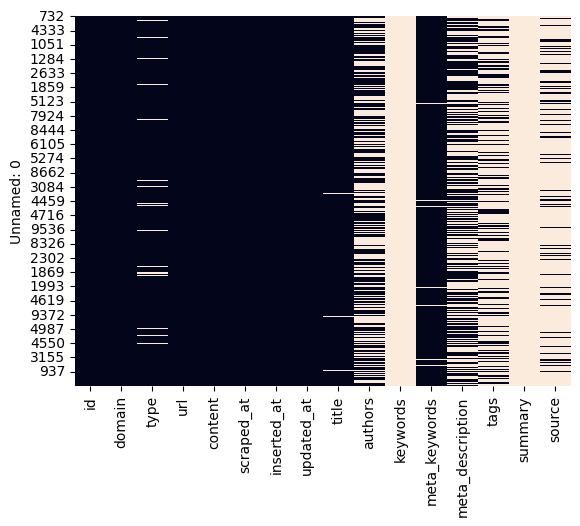

In [2]:
# amount of empty cells in dataset
sns.heatmap(raw_data.isnull(), cbar=False)
raw_data.isnull().sum()

### Destribution of types

In [3]:
# percentage destribution of types
type_dist = raw_data['type'].value_counts(normalize=True) * 100
print(type_dist)

type
reliable                      23.074406
political                     20.535803
bias                          14.065670
fake                          11.072788
conspiracy                    10.273708
rumor                          5.959055
unknown                        4.596005
unreliable                     3.730097
clickbait                      2.893961
junksci                        1.482242
satire                         1.389338
hate                           0.926823
2018-02-10 13:43:39.521661     0.000106
Name: proportion, dtype: float64


### Amount of '!' (exclamations) in fake news vs. reliable news

There seems to be a lot more '!'-characters in fake labelled articles

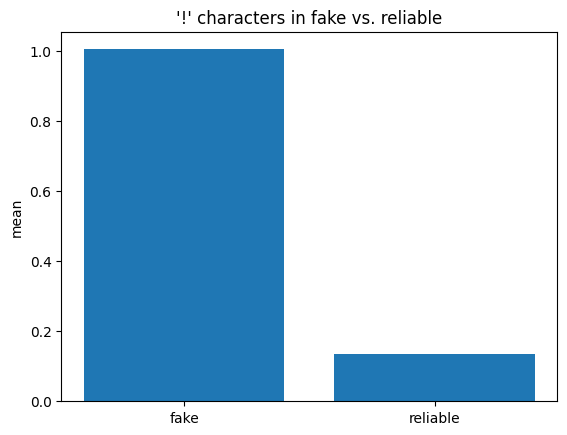

In [4]:
import matplotlib.pyplot as plt

char = '!'

# copy dataframe
exclm_data = raw_data.copy(deep=True)

# get count sum of exclamation points in each article
exclm_data['exclm_count'] = exclm_data['content'].str.count(char)

# get total sum of exclamation points for each type (labels)
fake_exclm_sum = (exclm_data[ (exclm_data['type'] == 'fake')])['exclm_count'].mean()
reliable_exclm_sum = (exclm_data[ (exclm_data['type'] == 'reliable')])['exclm_count'].mean()

# plot data
fig, ax = plt.subplots()

ax.set_ylabel('mean')
ax.set_title('\'!\' characters in fake vs. reliable')

ax.bar(['fake', 'reliable'], [fake_exclm_sum, reliable_exclm_sum])

plt.show()

### Amount of '!' (exclamations) in each type of labels

'political' has most exclamations points. Second is 'fake'.

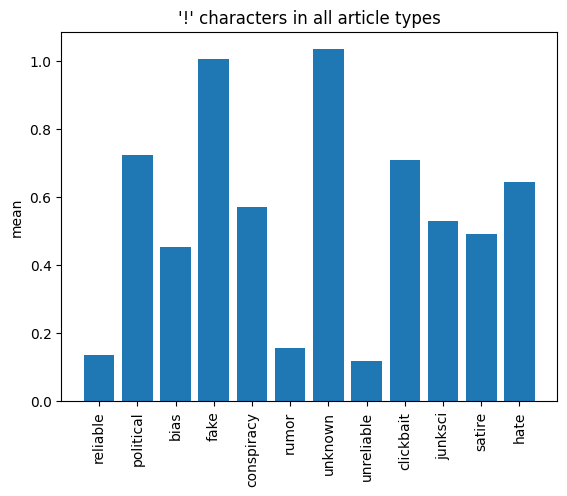

In [5]:
import matplotlib.pyplot as plt

char = '!'

# copy dataframe
exclm_data = raw_data.copy(deep=True)

# get count sum of exclamation points in each article
exclm_data['exclm_count'] = exclm_data['content'].str.count(char)

# get total sum of exclamation points for each type (labels)
types = ['reliable',
         'political',
         'bias',
         'fake',
         'conspiracy',
         'rumor',
         'unknown',
         'unreliable',
         'clickbait',
         'junksci',
         'satire',
         'hate'
         ]

sums = []
for type in types:
    sum = (exclm_data[ (exclm_data['type'] == type)])['exclm_count'].mean()
    sums.append(sum)

# plot data
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')

ax.set_ylabel('mean')
ax.set_title('\'!\' characters in all article types')

ax.bar(types, sums)

plt.show()

### Amount of unique words in reliable news vs. fake news

Exploring the mean of different words for each article type. The results shows that 'reliable' has more unique words then 'fake'.

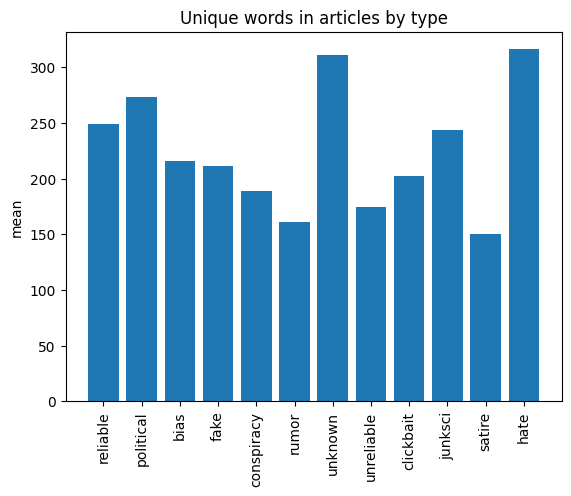

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Data is loaded from a new file 'word_freq' to minimize the file-size on the cleaned dataset.
# The filesize of 'word_freq' is small.

src = 'data/word_freq.csv'
word_freq = pd.read_csv(src)

# get total mean of exclamation points for each type (labels)
types = ['reliable',
         'political',
         'bias',
         'fake',
         'conspiracy',
         'rumor',
         'unknown',
         'unreliable',
         'clickbait',
         'junksci',
         'satire',
         'hate'
         ]

means = []
for type in types:
    mean = (word_freq[ (word_freq['type'] == type)])['content_word_freq'].mean()
    means.append(mean)

# plot data
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')

ax.set_ylabel('mean')
ax.set_title('Unique words in articles by type')

ax.bar(types, means)

plt.show()


### Do Fake news have less author names then reliable news? 

From the barplot, it seems that 'reliable' news have more missing authors, then 'fake' news. So actually the opposite of our hypothesis.

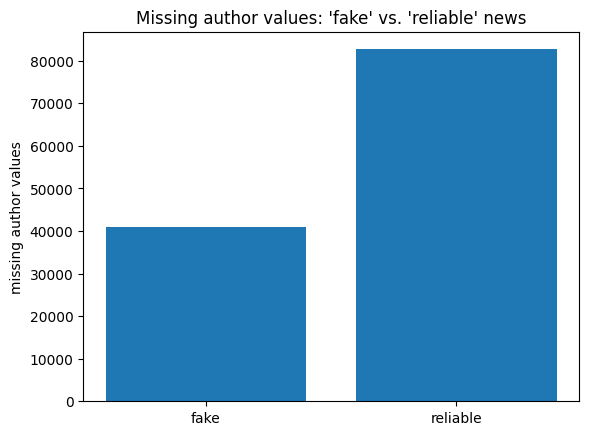

In [7]:
import matplotlib.pyplot as plt

# get all rows with label 'fake'
fake_data = raw_data[(raw_data['type'] == 'fake')]

# count rows for 'fake' with no author names 
fake_auth_isNull_sum = fake_data['authors'].isnull().sum()

# get all rows with label 'reliable'
reliable_data = raw_data[(raw_data['type'] == 'reliable')]

# count rows for 'reliable' with no author names
reliable_auth_isNull_sum = reliable_data['authors'].isnull().sum()

# plot comparison
fig, ax = plt.subplots()

ax.set_ylabel('missing author values')
ax.set_title('Missing author values: \'fake\' vs. \'reliable\' news')

ax.bar(['fake', 'reliable'], [fake_auth_isNull_sum, reliable_auth_isNull_sum])

plt.show()

### Correlations between word reduction rates between reliable vs. fake?

Exploring if 'fake' have an avarage higher reduction rate then 'reliable'. The results shows the 'fake' has a higher reduction rate then 'reliable'.

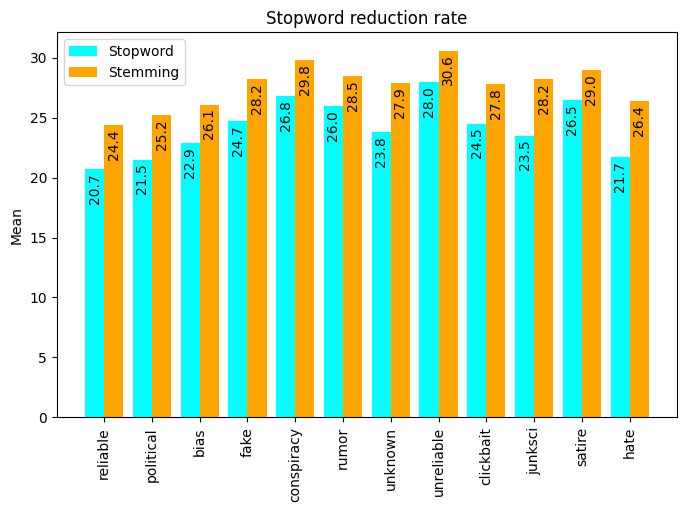

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data is loaded from a new file 'word_freq' to minimize the file-size on the cleaned dataset.
# The filesize of 'word_freq' is small.

src = 'data/word_freq.csv'
word_freq = pd.read_csv(src)

# get total mean of exclamation points for each type (labels)
types = ['reliable',
         'political',
         'bias',
         'fake',
         'conspiracy',
         'rumor',
         'unknown',
         'unreliable',
         'clickbait',
         'junksci',
         'satire',
         'hate'
         ]

stop_means = []
stem_means = []
for type in types:
    stop_mean = (word_freq[ (word_freq['type'] == type)])['stop_reduction_rate'].mean()
    stem_mean = (word_freq[ (word_freq['type'] == type)])['stem_reduction_rate'].mean()
    stop_means.append(round(stop_mean, 1))
    stem_means.append(round(stem_mean, 1))

# plot data
fig, ax = plt.subplots(figsize=(8,5))

x = np.arange(len(types))
width = 0.4  # the width of the bars
offset = width/2

stop_bar = ax.bar(x-offset, stop_means, width, color='cyan')
ax.bar_label(stop_bar, stop_means, padding=-25, rotation=90)

stem_bar = ax.bar(x+offset, stem_means, width, color='orange')
ax.bar_label(stem_bar, stem_means, padding=-25, rotation=90)

ax.set_ylabel('Mean')
ax.set_title('Stopword reduction rate')
plt.xticks(x, types, rotation='vertical')
plt.legend(["Stopword", "Stemming"])

plt.show()


## Cleaned dataset

In [10]:
import pandas as pd
import seaborn as sns

# load cleaned dataset
src = 'data/995,000_rows_cleaned.csv'
clean_data = pd.read_csv(src, index_col=0)

### Empty cells

Unnamed: 0                0
type                      0
content                   0
title                  8581
authors              423569
content_clean             0
content_stopword          0
content_stem              0
content_word_freq         0
dtype: int64

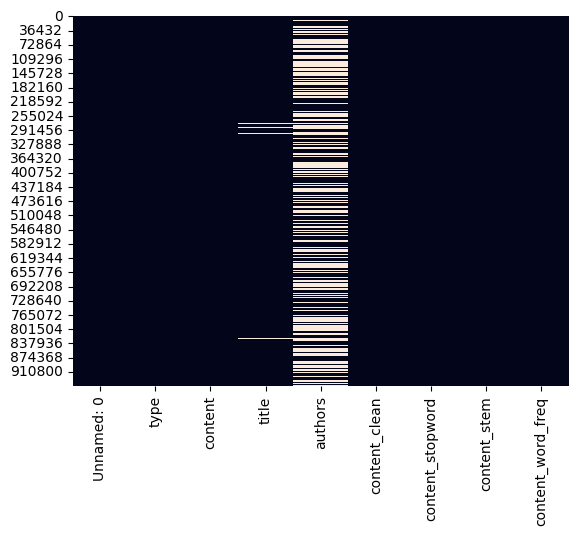

In [11]:
# amount of empty cells in dataset
sns.heatmap(clean_data.isnull(), cbar=False)
clean_data.isnull().sum()

### Destribution of types

In [12]:
# percentage destribution of types
type_dist = clean_data['type'].value_counts(normalize=True) * 100
print(type_dist)

type
reliable                      23.074324
political                     20.535825
bias                          14.065685
fake                          11.072800
conspiracy                    10.273719
rumor                          5.959061
unknown                        4.596010
unreliable                     3.730101
clickbait                      2.893964
junksci                        1.482243
satire                         1.389339
hate                           0.926824
2018-02-10 13:43:39.521661     0.000106
Name: proportion, dtype: float64


### Amount of ',' (commas) in fake news vs. reliable news

In [13]:
# Function to count comma 
def count_comma(text):
    return text.count(',')

# Apply
clean_data['comma_count'] = clean_data['content_clean'].apply(count_comma)


In [14]:
#  Filter DataFrame for articles labeled as 'fake'
fake_articles = clean_data[clean_data['type'] == 'fake']

# Total commas in 'fake' content
total_fake_nums = fake_articles['comma_count'].sum()
print("Total commas in 'fake' content:", total_fake_nums)

# Filter DataFrame for articles labeled as 'reliable'
reliable_articles = clean_data[clean_data['type'] == 'reliable']

# Total commas in 'reliable' content
total_reliable_nums = reliable_articles['comma_count'].sum()
print("Total commas in 'reliable' content:", total_reliable_nums)

# Minimum number of commas in 'fake' content
min_fake_nums = fake_articles['comma_count'].min()
print("Minimum number of commas in 'fake' content:", min_fake_nums)

# Maximum number of commas in 'fake' content
max_fake_nums = fake_articles['comma_count'].max()
print("Maximum number of commas in 'fake' content:", max_fake_nums)

# Mean number of commas in 'fake' content
mean_fake_nums = fake_articles['comma_count'].mean()
print("Mean number of commas in 'fake' content:", mean_fake_nums)

# Minimum number of commas in 'reliable' content
min_reliable_nums = reliable_articles['comma_count'].min()
print("Minimum number of commas in 'reliable' content:", min_reliable_nums)

# Maximum number of commas in 'reliable' content
max_reliable_nums = reliable_articles['comma_count'].max()
print("Maximum number of commas in 'reliable' content:", max_reliable_nums)

# Mean number of commas in 'reliable' content
mean_reliable_nums = reliable_articles['comma_count'].mean()
print("Mean number of commas in 'reliable' content:", mean_reliable_nums)

Total commas in 'fake' content: 2197520
Total commas in 'reliable' content: 6649783
Minimum number of commas in 'fake' content: 0
Maximum number of commas in 'fake' content: 1594
Mean number of commas in 'fake' content: 20.95210853999218
Minimum number of commas in 'reliable' content: 0
Maximum number of commas in 'reliable' content: 2584
Mean number of commas in 'reliable' content: 30.42501704314088


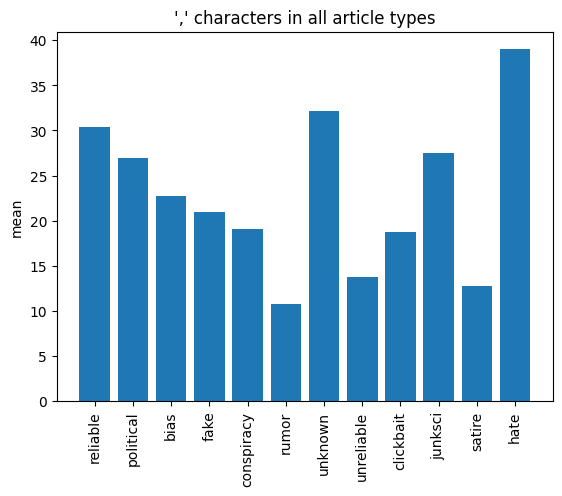

In [15]:
import matplotlib.pyplot as plt

# get total sum of exclamation points for each type (labels)
types = ['reliable',
         'political',
         'bias',
         'fake',
         'conspiracy',
         'rumor',
         'unknown',
         'unreliable',
         'clickbait',
         'junksci',
         'satire',
         'hate'
         ]

sums = []
for type in types:
    sum = (clean_data[ (clean_data['type'] == type)])['comma_count'].mean()
    sums.append(sum)

# plot data
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')

ax.set_ylabel('mean')
ax.set_title('\',\' characters in all article types')

ax.bar(types, sums)

plt.show()

### Length of sentences in reliable news vs. fake news

In [16]:
import swifter

def average_sentence_length(text):
    # Split the text into sentences
    sentences = text.split('.')
    
    # Initialize variables to store total length and number of sentences
    total_length = 0
    num_sentences = 0
    
    # Iterate through each sentence to calculate total length and count the number of sentences
    for sentence in sentences:
        # Count the number of words in the sentence
        words = sentence.split()
        length = len(words)
        
        # Add the length of the current sentence to the total length
        total_length += length
        
        # Increment the number of sentences
        if length > 0:  # Exclude empty sentences
            num_sentences += 1
    
    # Calculate the average length of sentences
    if num_sentences > 0:
        average_length = total_length / num_sentences
    else:
        average_length = 0
    
    return average_length

# Apply
clean_data['average_sentence_length'] = clean_data['content'].swifter.apply(average_sentence_length)

/Users/kristian/miniconda3/envs/fake-news-proj/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 947213/947213 [00:28<00:00, 33441.35it/s]


In [17]:
# Filter DataFrame for articles labeled as 'fake'
fake_articles = clean_data[clean_data['type'] == 'fake']

# Filter DataFrame for articles labeled as 'reliable'
reliable_articles = clean_data[clean_data['type'] == 'reliable']

# Minimum number in 'fake' content
min_fake_nums = fake_articles['average_sentence_length'].min()
print("Minimum average length in 'fake' content:", min_fake_nums)

# Maximum number in 'fake' content
max_fake_nums = fake_articles['average_sentence_length'].max()
print("Maximum average length in 'fake' content:", max_fake_nums)

# Mean number in 'fake' content
mean_fake_nums = fake_articles['average_sentence_length'].mean()
print("Mean average length in 'fake' content:", mean_fake_nums)

# Minimum number in 'reliable' content
min_reliable_nums = reliable_articles['average_sentence_length'].min()
print("Minimum average length in 'reliable' content:", min_reliable_nums)

# Maximum number in 'reliable' content
max_reliable_nums = reliable_articles['average_sentence_length'].max()
print("Maximum average length in 'reliable' content:", max_reliable_nums)

# Mean number of in 'reliable' content
mean_reliable_nums = reliable_articles['average_sentence_length'].mean()
print("Mean average length in 'reliable' content:", mean_reliable_nums)

Minimum average length in 'fake' content: 2.25
Maximum average length in 'fake' content: 717.0
Mean average length in 'fake' content: 18.712833102534844
Minimum average length in 'reliable' content: 1.4285714285714286
Maximum average length in 'reliable' content: 801.0
Mean average length in 'reliable' content: 16.498754424582746


In [18]:
reliable_articles['average_sentence_length'].median()

15.666666666666666

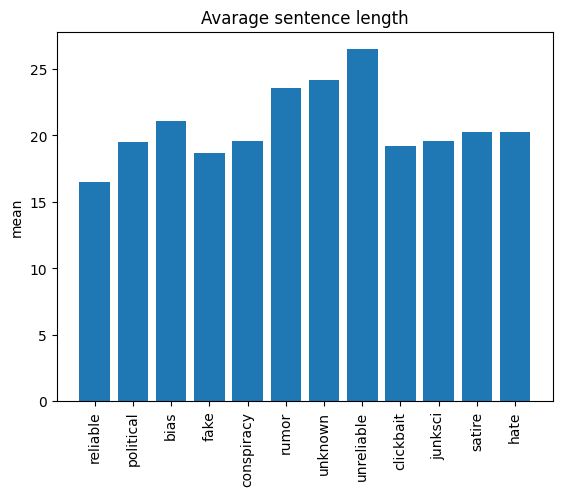

In [19]:
import matplotlib.pyplot as plt

# get total sum of exclamation points for each type (labels)
types = ['reliable',
         'political',
         'bias',
         'fake',
         'conspiracy',
         'rumor',
         'unknown',
         'unreliable',
         'clickbait',
         'junksci',
         'satire',
         'hate'
         ]

sums = []
for type in types:
    sum = (clean_data[ (clean_data['type'] == type)])['average_sentence_length'].mean()
    sums.append(sum)

# plot data
fig, ax = plt.subplots()
plt.xticks(rotation='vertical')

ax.set_ylabel('mean')
ax.set_title('Avarage sentence length')

ax.bar(types, sums)

plt.show()

### Do Fake news have less titles then reliable news? 

In [20]:
title_counts = clean_data.groupby('type')['title'].apply(lambda x: x.notnull().mean())
print(title_counts)

type
2018-02-10 13:43:39.521661    0.000000
bias                          0.999707
clickbait                     1.000000
conspiracy                    0.913044
fake                          0.999981
hate                          1.000000
junksci                       1.000000
political                     0.999907
reliable                      1.000000
rumor                         1.000000
satire                        0.997340
unknown                       0.999770
unreliable                    0.999604
Name: title, dtype: float64
